<a href="https://colab.research.google.com/github/sada1908/edyoda_mldl/blob/main/edyoda_MLDL_Assign_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files


In [4]:
import pandas as pd

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HousingData.csv to HousingData.csv
User uploaded file "HousingData.csv" with length 35008 bytes


# Task
Analyze the housing price dataset "housing.csv" using linear regression, considering multicollinearity, and provide a step-by-step Python code solution.

## Load and explore data

### Subtask:
Load the housing data into a pandas DataFrame and perform initial exploration to understand the data structure, identify missing values, and visualize distributions.


**Reasoning**:
The subtask requires loading the data, exploring its structure, identifying missing values, and visualizing distributions. These steps can be combined into a single code block.



First 5 rows of the DataFrame:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

Descriptive Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



Missing Values per Column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Histograms of Numerical Columns:


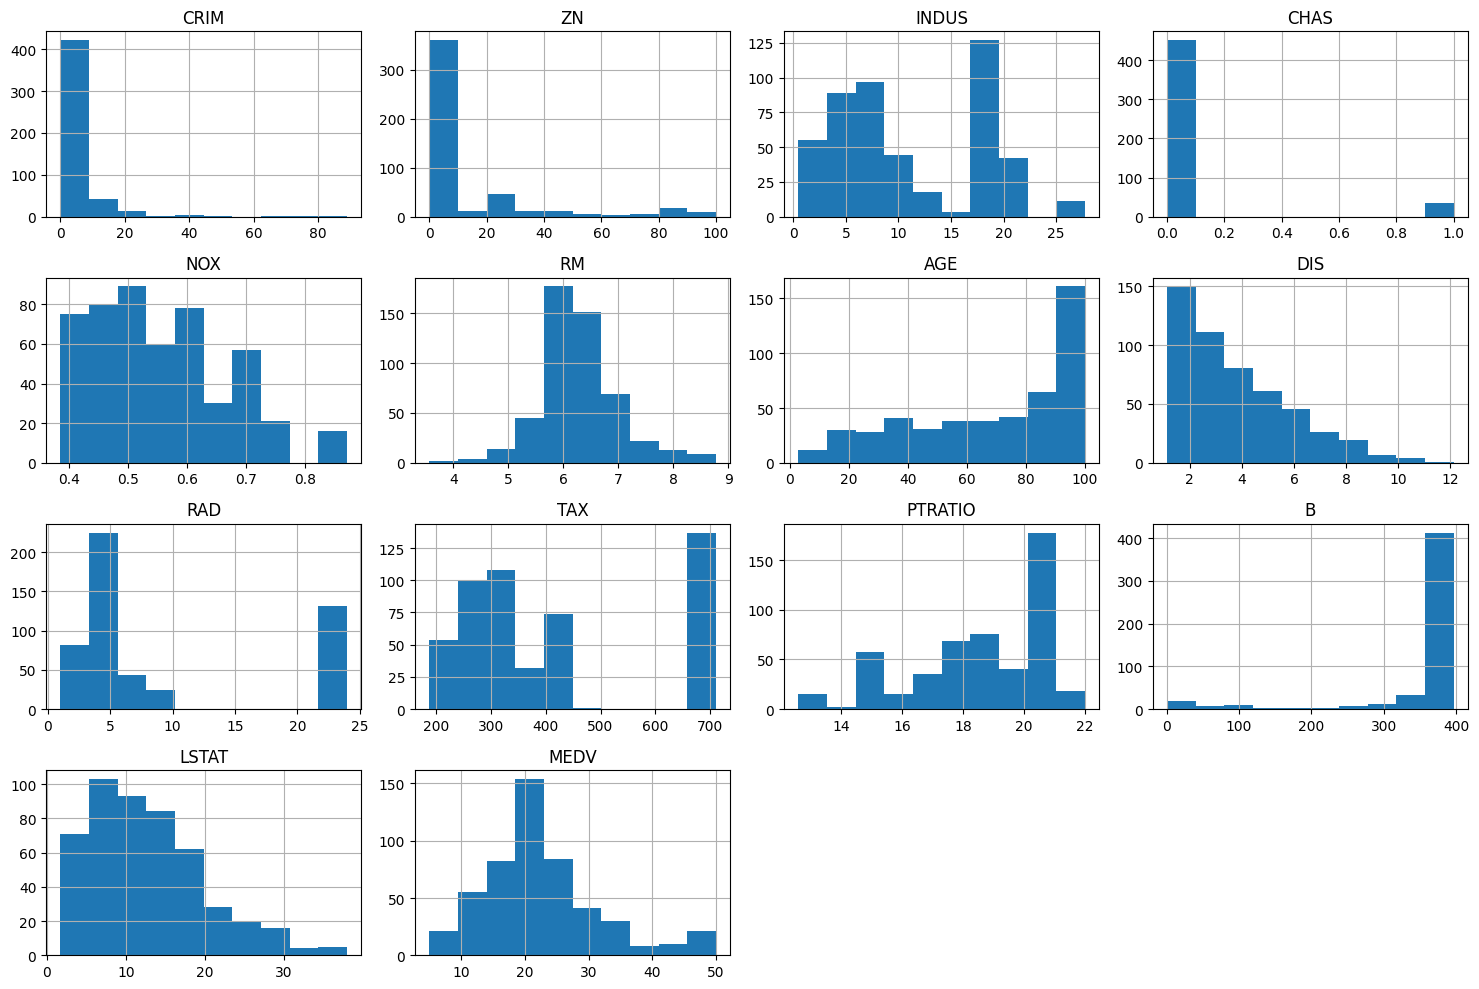

In [6]:
df = pd.read_csv('HousingData.csv')

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nHistograms of Numerical Columns:")
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Handle missing values

### Subtask:
Address any missing values in the dataset using appropriate techniques such as imputation or removal.


**Reasoning**:
Impute missing values in the 'CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RM', and 'LSTAT' columns with the median based on the distributions observed in the histograms.



In [7]:
for col in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RM', 'LSTAT']:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-3077301795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


**Reasoning**:
Verify that all missing values have been handled.



In [8]:
print("\nMissing Values per Column after Imputation:")
print(df.isnull().sum())


Missing Values per Column after Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Multicollinearity check

### Subtask:
Check for multicollinearity among the independent variables using techniques like Variance Inflation Factor (VIF).


**Reasoning**:
Calculate the Variance Inflation Factor (VIF) for each independent variable to check for multicollinearity.



In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df.drop('MEDV', axis=1)
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values for independent variables:")
display(vif_data)

VIF values for independent variables:


,variable,VIF
0,const,579.851927
1,CRIM,1.695853
2,ZN,2.115316
3,INDUS,3.601473
4,CHAS,1.066547
5,NOX,4.215560
6,RM,1.867625
7,AGE,2.748850
8,DIS,3.746430
9,RAD,7.344979


## Address multicollinearity

### Subtask:
If multicollinearity is detected, apply techniques such as removing highly correlated variables or using dimensionality reduction methods like PCA.


**Reasoning**:
Identify variables with high VIF values and remove them from the DataFrame to address multicollinearity.



In [10]:
high_vif_variables = vif_data[vif_data['VIF'] > 5]['variable'].tolist()
print(f"Variables with VIF > 5: {high_vif_variables}")

variables_to_drop = ['TAX'] # Based on VIF values, dropping 'TAX' as it has a higher VIF than 'RAD' and they are often correlated.

X_reduced = X.drop(columns=variables_to_drop)

print("\nFirst 5 rows of the reduced DataFrame:")
display(X_reduced.head())

Variables with VIF > 5: ['const', 'RAD', 'TAX']

First 5 rows of the reduced DataFrame:


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,18.7,396.90,11.43


## Split data

### Subtask:
Split the data into training and testing sets for model development and evaluation.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [11]:
from sklearn.model_selection import train_test_split

y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


## Build and train linear regression model

### Subtask:
Build and train a linear regression model on the training data.


**Reasoning**:
Build and train a linear regression model on the training data.



In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).


**Reasoning**:
Calculate and print the evaluation metrics for the trained model on the test data.



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 25.80
Root Mean Squared Error (RMSE): 5.08
R-squared (R2): 0.65


## Interpret results

### Subtask:
Interpret the model coefficients to understand the impact of each independent variable on the housing prices.


**Reasoning**:
Access the learned coefficients and intercept from the trained linear regression model and display them in a DataFrame.



In [14]:
coefficients = pd.DataFrame({
    'variable': X_reduced.columns,
    'coefficient': model.coef_
})

# Add the intercept
intercept_row = pd.DataFrame({
    'variable': ['Intercept'],
    'coefficient': [model.intercept_]
})

coefficients = pd.concat([intercept_row, coefficients], ignore_index=True)

print("Model Coefficients:")
display(coefficients)

Model Coefficients:


,variable,coefficient
0,Intercept,26.747664
1,const,0.000000
2,CRIM,-0.111257
3,ZN,0.019436
4,INDUS,-0.078686
5,CHAS,3.494548
6,NOX,-17.040148
7,RM,4.794476
8,AGE,-0.018177
9,DIS,-1.494038


**Reasoning**:
Interpret the coefficients from the DataFrame to understand the impact of each variable on housing prices and explain the meaning of positive and negative coefficients.



In [15]:
print("Interpretation of Coefficients:")
print("-" * 30)

for index, row in coefficients.iterrows():
    variable = row['variable']
    coefficient = row['coefficient']

    if variable == 'Intercept':
        print(f"Intercept: {coefficient:.4f}")
        print("The intercept represents the expected mean value of housing prices when all independent variables are zero.")
    elif variable == 'const':
        # The 'const' variable was added for VIF calculation and is not a real predictor in the model
        pass
    else:
        print(f"{variable}: {coefficient:.4f}")
        if coefficient > 0:
            print(f"  - A one-unit increase in {variable} is associated with an increase of {abs(coefficient):.4f} in housing price, assuming all other variables are held constant.")
        else:
            print(f"  - A one-unit increase in {variable} is associated with a decrease of {abs(coefficient):.4f} in housing price, assuming all other variables are held constant.")

print("-" * 30)
print("General Interpretation:")
print("- A positive coefficient indicates a positive relationship between the independent variable and housing price: as the variable increases, the housing price tends to increase.")
print("- A negative coefficient indicates a negative relationship: as the variable increases, the housing price tends to decrease.")
print("- The magnitude of the coefficient indicates the strength of the relationship: a larger absolute value means a stronger impact on housing price.")

Interpretation of Coefficients:
------------------------------
Intercept: 26.7477
The intercept represents the expected mean value of housing prices when all independent variables are zero.
CRIM: -0.1113
  - A one-unit increase in CRIM is associated with a decrease of 0.1113 in housing price, assuming all other variables are held constant.
ZN: 0.0194
  - A one-unit increase in ZN is associated with an increase of 0.0194 in housing price, assuming all other variables are held constant.
INDUS: -0.0787
  - A one-unit increase in INDUS is associated with a decrease of 0.0787 in housing price, assuming all other variables are held constant.
CHAS: 3.4945
  - A one-unit increase in CHAS is associated with an increase of 3.4945 in housing price, assuming all other variables are held constant.
NOX: -17.0401
  - A one-unit increase in NOX is associated with a decrease of 17.0401 in housing price, assuming all other variables are held constant.
RM: 4.7945
  - A one-unit increase in RM is associat

## Summary:

### Data Analysis Key Findings

*   The dataset contained missing values in several columns ('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RM', 'LSTAT'), which were imputed using the median.
*   Multicollinearity was detected among the independent variables, with 'RAD' (VIF=7.34) and 'TAX' (VIF=8.87) showing VIF values above 5.
*   The 'TAX' variable was removed from the dataset to address multicollinearity.
*   The data was split into training (80%) and testing (20%) sets.
*   A linear regression model was trained on the training data.
*   The model achieved a Mean Squared Error (MSE) of 25.80, a Root Mean Squared Error (RMSE) of 5.08, and an R-squared (\$\text{R}^2\$) of 0.65 on the testing data.
*   The model coefficients indicate the relationship between each independent variable and housing prices. For instance, a one-unit increase in 'RM' (average number of rooms) is associated with an increase in housing price, while a one-unit increase in 'LSTAT' (percentage of lower status population) is associated with a decrease in housing price, assuming other variables are held constant.

### Insights or Next Steps

*   The model's \$\text{R}^2\$ of 0.65 suggests that approximately 65% of the variance in housing prices can be explained by the independent variables in the model. Further model improvements could be explored to increase the explanatory power.
*   Investigate potential interactions between variables or consider non-linear relationships to potentially improve the model's performance.
